# Data Transformation

## What is Data Transformation?

Data transformation is the process of converting data from one format to another format in order to make it more suitable for analysis or machine learning. It involves changing the scale, format, or structure of the data in order to improve its quality, stability, or normality. Data transformation can involve various techniques such as normalization, standardization, feature scaling, encoding categorical variables, and handling missing values. It is an important step in the data preprocessing stage of machine learning and data analysis pipelines.


<img src="https://miro.medium.com/1*LXuBIQBworBtFub0lxpSTg.png"/>

## Advanced Data Transformation Types with Distirubution

### Box Cox Transformation

**Box Cox Transformation** is a power transformation technique used to stabilize variance and make data more normally distributed. It is a widely used data transformation technique in statistics and machine learning.

The Box-Cox transformation is defined as:

$$y = \frac{x^\lambda - 1}{\lambda}$$

Where $x$ is the original data, $y$ is the transformed data, and $\lambda$ is the power transformation parameter.

The Box-Cox transformation is useful for:

* Stabilizing variance
* Making data more normally distributed
* Improving the accuracy of statistical models

### Yeo-Johnson Transformation

**Yeo-Johnson Transformation** is a power transformation technique used to stabilize variance and make data more normally distributed. It is a widely used data transformation technique in statistics and machine learning.

The Yeo-Johnson transformation is defined as:

$$y = \ln\left(\frac{x+0.5}{1-x}\right)$$

Where $x$ is the original data, $y$ is the transformed data.

The Yeo-Johnson transformation is useful for:

* Stabilizing variance
* Making data more normally distributed
* Improving the accuracy of statistical models

Both Box-Cox and Yeo-Johnson transformations are useful for transforming data that is not normally distributed, but the choice of which transformation to use depends on the specific characteristics of the data and the requirements of the analysis or model.


<img src="https://file-cdn.sider.ai/u/U0GVH73Z60G/file/828fe6e4-c5b8-41d9-b9d2-99127cacd065/19b031ec678f6.png?Key-Pair-Id=K344F5VVSSM536&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9maWxlLWNkbi5zaWRlci5haS8qL1UwR1ZINzNaNjBHLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3Njc4NzU4MTV9fX1dfQ__&Signature=hYUW0iEjijqAKI9NR3OThs2cM-PvzWvOuX2vyPnNgBdSG5sFPcMQTPtWydTzn2LbkB5Xx5iPVu0Mv9NpURPvVW6ESU4qCY1Y4FMgWxbI1XMFydKBJ6MaNGaVZU2bX2XA5byR8rpSH6Ld8zalpwt1i~t7Vj-390tCagUUVBh0RD2s8y7s~~ildGe6qkmW8DmViiJ6KWzTUeQhTrLTuNw5RRm7llivIAAEXVRXI7TWzb84L6NP46dspI7jOqsMa7EY4Kn~ecKI1tz4iFVz~uKbrYZO-J6jOr-cRKHCLHx12jIeQhmjSh2rio~2HE4Uy0-mimhDravKsNZOzUitLcvolQ__"/>

## Code Example

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import PowerTransformer class from sklearn
from sklearn.preprocessing import PowerTransformer

In [4]:
# Load the tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


A dataset containing **244 records of restaurant bill and tipping behavior** collected at a restaurant. It's simple, real-world, and perfect for learning data science.

| Column | Description | Type |  
|--------|-------------|------|  
| **total_bill** | Total bill amount in dollars | Numerical |  
| **tip** | Tip amount in dollars | Numerical |  
| **sex** | Gender of the bill payer (Male/Female) | Categorical |  
| **smoker** | Whether the party smoked (Yes/No) | Categorical |  
| **day** | Day of the week (Thurs/Fri/Sat/Sun) | Categorical |  
| **time** | Meal time (Lunch/Dinner) | Categorical |  
| **size** | Number of people in the party | Numerical |  



In [ ]:
# explore the dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
# Select a numerical feature for transformation
# 'total_bill' is suitable as it's strictly positive
data_boxcox = tips['total_bill'].values.reshape(-1, 1)

# 'tip' can also be used, but let's illustrate Yeo-Johnson's versatility
# with a hypothetical scenario if 'tip' had zero or negative values (which it doesn't here)
# For demonstration, let's create a slightly modified 'total_bill' with a zero to show Yeo-Johnson
data_yeojohnson = tips['total_bill'].copy()
# Introduce a zero for demonstration purposes (in a real scenario, you'd have actual zeros/negatives)
data_yeojohnson[data_yeojohnson.sample(1).index] = 0.0
data_yeojohnson = data_yeojohnson.values.reshape(-1, 1)

In [11]:
# --- Box-Cox Transformation ---
# Box-Cox requires input data to be strictly positive.
# If your data contains zeros or negative values, Box-Cox cannot be applied directly.
pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
data_transformed_boxcox = pt_boxcox.fit_transform(data_boxcox)
print("Box-Cox Transformation Lambda:", pt_boxcox.lambdas_)
print("Box-Cox Transformed Data (first 5 rows):", data_transformed_boxcox[:5])

Box-Cox Transformation Lambda: [0.07691915]
Box-Cox Transformed Data (first 5 rows): [[3.1649037 ]
 [2.55904927]
 [3.43114656]
 [3.58305015]
 [3.63122184]]


In [12]:
# --- Yeo-Johnson Transformation ---
# Yeo-Johnson handles data with positive, negative, or zero values.
pt_yeojohnson = PowerTransformer(method='yeo-johnson', standardize=False)
data_transformed_yeojohnson = pt_yeojohnson.fit_transform(data_yeojohnson)
print("Yeo-Johnson Transformation Lambda:", pt_yeojohnson.lambdas_)
print("Yeo-Johnson Transformed Data (first 5 rows):", data_transformed_yeojohnson[:5])

Yeo-Johnson Transformation Lambda: [0.34010542]
Yeo-Johnson Transformed Data (first 5 rows): [[4.91623943]
 [3.77504515]
 [5.47405088]
 [5.80817448]
 [5.91657489]]


Text(0.5, 1.0, 'Box-Cox Transformed (lambda=0.08)')

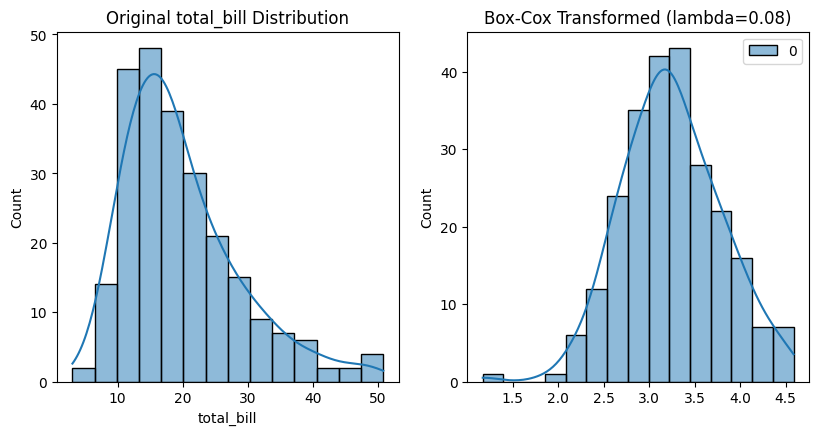

In [14]:
# --- Visualization ---
plt.figure(figsize=(15, 10))

# Original data distribution (total_bill)
plt.subplot(2, 3, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Original total_bill Distribution')

# Box-Cox Transformed data
plt.subplot(2, 3, 2)
sns.histplot(data_transformed_boxcox, kde=True)
plt.title(f'Box-Cox Transformed (lambda={pt_boxcox.lambdas_[0]:.2f})')



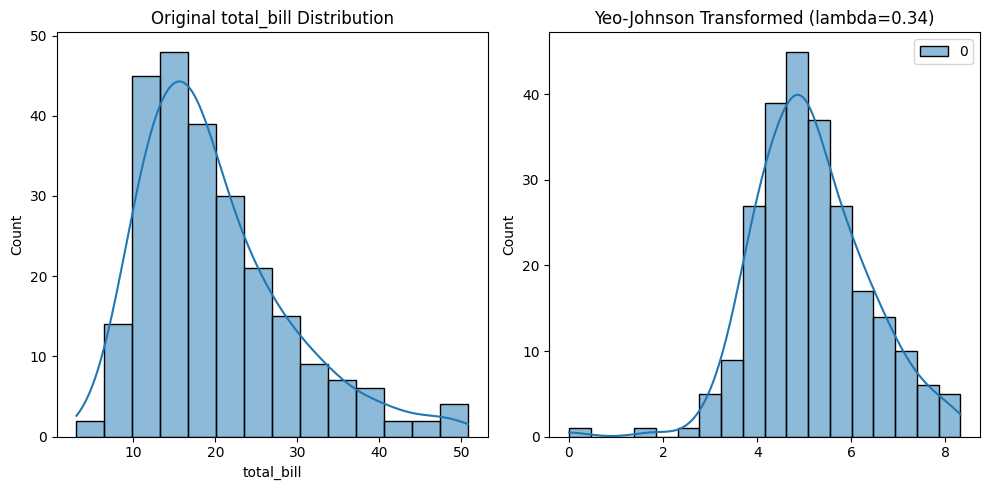

In [31]:
# --- Visualization ---

# Original data distribution (total_bill)
# --- Visualization ---
plt.figure(figsize=(10, 5))
                    

# Original data distribution (total_bill)
plt.subplot(1, 2, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Original total_bill Distribution')

# Yeo-Johnson Transformed data
plt.subplot(1, 2, 2)
sns.histplot(data_transformed_yeojohnson, kde=True)
plt.title(f'Yeo-Johnson Transformed (lambda={pt_yeojohnson.lambdas_[0]:.2f})')
plt.tight_layout()
plt.show()

In [32]:
print(f"Box-Cox estimated lambda for total_bill: {pt_boxcox.lambdas_[0]:.2f}")
print(f"Yeo-Johnson estimated lambda for modified total_bill: {pt_yeojohnson.lambdas_[0]:.2f}")

Box-Cox estimated lambda for total_bill: 0.08
Yeo-Johnson estimated lambda for modified total_bill: 0.34


--End--

Explanation:
Why Transform Data?
Many statistical models, such as linear regression, assume that the input features are normally distributed. When data deviates significantly from a normal distribution (e.g., skewed data), these models might perform poorly or produce unreliable results. Transformations aim to make the data more "Gaussian-like," improving model stability and predictive power.

The Dataset:
We use the tips dataset from the seaborn library. The total_bill column is a good candidate for transformation as its distribution is often right-skewed, not perfectly normal.

Box-Cox Transformation:

Assumption: The Box-Cox transformation is applicable only to strictly positive data. If your dataset contains zero or negative values, you cannot directly apply Box-Cox.
How it works: It's a family of power transformations parameterized by lambda (
λ
λ). The optimal 
λ
λ is estimated from the data. The goal is to find a 
λ
λ that transforms the data to approximate a normal distribution and stabilize variance.
Formula:
If 
λ
≠
0
λ

=0: 
Y
(
λ
)
=
Y
λ
−
1
λ
Y(λ)= 
λ
Y 
λ
 −1
​
 
If 
λ
=
0
λ=0: 
Y
(
λ
)
=
log
⁡
(
Y
)
Y(λ)=log(Y)
In Scikit-learn: You use PowerTransformer(method='box-cox').
Yeo-Johnson Transformation:

Versatility: This is the main difference from Box-Cox. The Yeo-Johnson transformation can be applied to data that contains positive, negative, or zero values. This makes it more versatile for real-world datasets.
How it works: Similar to Box-Cox, it's also a power transformation that estimates an optimal 
λ
λ. It essentially applies a modified Box-Cox transformation that adapts to the sign of the data.
Formula: (Simplified for understanding, the actual formula has two branches based on the sign of Y):
For 
Y
≥
0
Y≥0: It's similar to the Box-Cox formula.
For 
Y
<
0
Y<0: A different formula is used to handle negative values.
In Scikit-learn: You use PowerTransformer(method='yeo-johnson').
Key Differences Summarized:

Data Requirement:
Box-Cox: Data must be strictly positive (
>
0
>0).
Yeo-Johnson: Can handle positive, negative, and zero values.
Applicability: Yeo-Johnson is generally preferred when you are unsure about the presence of zeros or negative values, or if your data naturally contains them.
Scikit-learn Implementation:
The sklearn.preprocessing.PowerTransformer class is used for both. You specify the method parameter as either 'box-cox' or 'yeo-johnson'.

fit_transform(): This method calculates the optimal 
λ
λ from the training data (fit) and then applies the transformation to that data (transform).
standardize=False: We set this to False to only apply the power transformation and not also scale the data to zero mean and unit variance, allowing us to focus purely on the effect of the power transformation on the distribution shape.
Visualizing the Impact:
The histograms and Q-Q plots illustrate the effect of the transformations.

Histograms: Show the distribution of the data before and after transformation. You should observe the transformed data's histogram appearing more bell-shaped (approximating a normal distribution).
Q-Q (Quantile-Quantile) Plots: Compare the quantiles of your data against the quantiles of a theoretical normal distribution. If the data is normally distributed, the points on the Q-Q plot will lie close to the 45-degree reference line. Deviations from this line indicate departures from normality. After transformation, you should see the points moving closer to the line.
In the example, you'll notice how both transformations try to make the total_bill distribution more symmetrical and bell-shaped. The lambda values estimated by each method will also be printed, giving you an idea of the optimal power found for the transformation. Remember that while total_bill itself is strictly positive, I've artificially introduced a zero into a copy of the data for the Yeo-Johnson demonstration to highlight its ability to handle such values where Box-Cox would fail.